# Part II - (Ford Gobike System Data Exploration)
## by (Samantha Erskine)


## Investigation Overview
> In this section, I will highlight one of my features of interest, which is seen to be the age group of members, and how this feature shows more insight as it is compared against other features which are the duration of bike rides in minutes and the user type. This will be shown in three visualizations, one univariate, one bivariate and one multivariate.


## Dataset Overview

>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month and year of February 2019. It contains 183412 columns and 16 rows, and is stored in a csv file. Columns include duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id, user_type,
member_birth_year, member_gender, and bike_share_for_all_trip.
      


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

def Format( x_label, y_label, title):
    plt.title(title,size=20,fontweight='bold')
    plt.xlabel(x_label,size=18)
    plt.ylabel(y_label,size=18)
    plt.show()


In [2]:
# load in the dataset into a pandas dataframe
gobike=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Afrofem Data Analytics 2 class\201902-fordgobike-tripdata.csv")

gobike_clean=gobike.copy()
gobike_clean.dropna(inplace=True)

#Creating a new column named duration_min to change duration in second column, duration_sec into minutes
gobike_clean['duration_min']= (gobike.duration_sec/60).astype(int)

#Dropping columns that are not needed for this particular analysis
gobike_clean.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec'],axis=1,inplace=True)

#Creating a member_age column from the member_birth_year column that was provided
gobike_clean['member_age']=(2019-gobike_clean.member_birth_year).astype(int)

#Creating a new column that specifies the duration in hours
gobike_clean['duration_hour'] = (gobike_clean.duration_min/60).astype(int)

#Changing member_birth_year column from float to int
gobike_clean['member_birth_year']=gobike_clean['member_birth_year'].astype(int)

gobike_clean['member_age_group'] =pd.cut(x=pd.to_numeric(gobike_clean['member_age'], errors='coerce'), bins=[0,30,60,150], labels=["young","middle_aged","old"])


## (Visualization 1)

> This univariate visualization shows distribution of the age of members in the go bike Ford share system. This histogram shows the distribution of riders and most riders are between the ages of 25 and 35, while the least amount of riders in terms of age, are those older than 75.


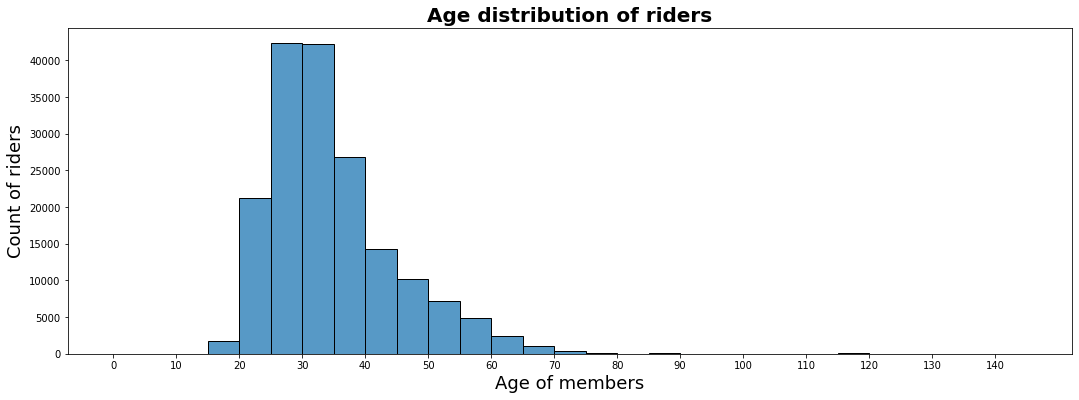

In [3]:
#Age distribution
plt.figure(figsize=[18,6])
base_color = sns.color_palette()[0]
sns.histplot(gobike_clean['member_age'],bins=range(0,gobike_clean['member_age'].max()+ 5, 5), color = base_color)
plt.xticks(ticks=range(0, 150, 10))
Format('Age of members','Count of riders', 'Age distribution of riders');

## (Visualization 2)

> This bivariate visualization shows the relationship between the age of members and the duration in minutes, that each person rode. The scatter plot indicates a relationship between the age of members and the duration of minutes in which they rode the ford go bikes. It indicates that people aged between 20 and 60 rode bikes up to 200 minutes and a fewer number of them drove past the 200 minute mark up to 1400 minutes. Above 60 years of age, fewer people ride for a fewer number of minutes. This means there is a negative correlation between the age of members and the number of minutes they ride the bike. It also shows there are a small amount of people who ride aged above 80.

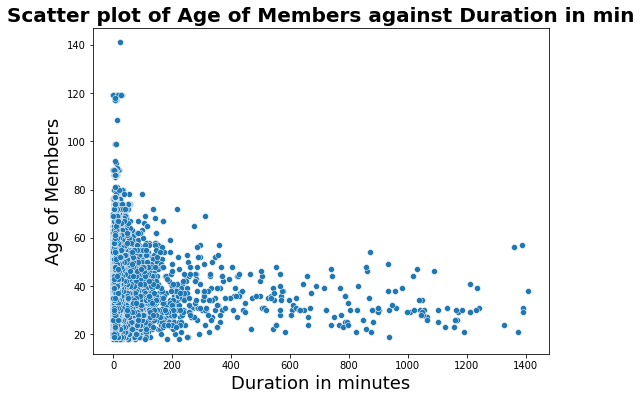

In [4]:
#Duration Vs. Member Age
#Duration Vs. Member Age
plt.figure(figsize = [18, 6])
plt.subplot(1, 2, 1)
sns.scatterplot(data = gobike_clean, x = 'duration_min', y = 'member_age')
Format('Duration in minutes','Age of Members','Scatter plot of Age of Members against Duration in min');


## (Visualization 3)
> This final multivariate visualization shows the relationship between the age of members, the user type they opted for and the duration of minutes in which the bikes were ridden.

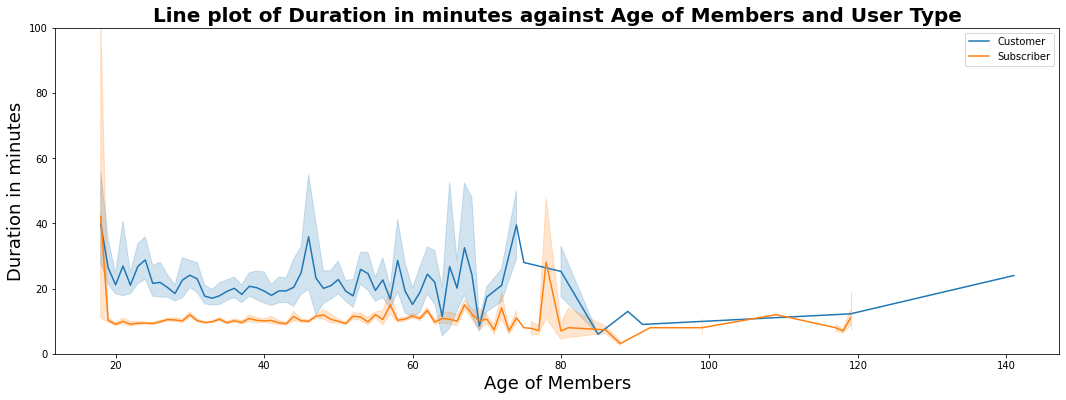

In [5]:
#Duration in Minutes Against Birth year and User type
plt.figure(figsize=[18,6])
sns.lineplot(data= gobike_clean,x='member_age',y='duration_min',hue='user_type')
plt.ylim(0,100)
plt.legend()
Format('Age of Members','Duration in minutes', 'Line plot of Duration in minutes against Age of Members and User Type');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [2]:

!jupyter nbconvert --execute --allow-errors --to html Part_II_exploration.ipynb 

[NbConvertApp] WARNING | Config option `template_path` not recognized by `HTMLExporter`.  Did you mean one of: `extra_template_paths, template_name, template_paths`?
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 513, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\exporters\templateexporter.py", line 330, in __init